In [10]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models, optimizers, losses, metrics, activations
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import time
rand_seed = int(time.time())
data_file = 'spiral.csv'

In [5]:
np.random.seed(rand_seed)
tf.set_random_seed(rand_seed)

In [8]:
import urllib
url = "https://raw.githubusercontent.com/madewithml/lessons/master/data/spiral.csv"
response = urllib.request.urlopen(url)
html = response.read()
with open(data_file, 'wb') as fp:
    fp.write(html)

In [11]:
df = pd.read_csv(data_file)

In [16]:
X = df[['X1', 'X2']].values
y = df[['color']].values

In [23]:
from sklearn.preprocessing import LabelEncoder
y_encoder = LabelEncoder()
y = y.ravel()
y_encoder.fit(y)
y_samples = y_encoder.transform(y)

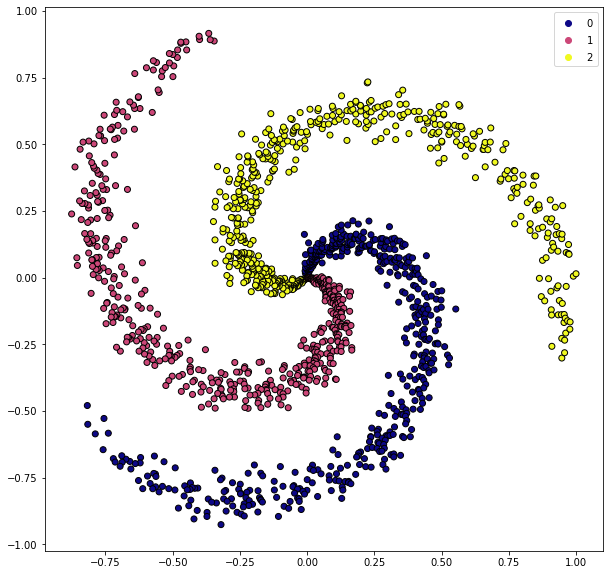

In [57]:
plt.figure(figsize=(10, 10))
scatter_colors = {'c1': 'red', 'c2': 'blue', 'c3': 'aqua'}
hdl = plt.scatter(X[:, 0], X[:, 1], c=y_samples, cmap='plasma', edgecolors='black')
plt.legend(handles=hdl.legend_elements()[0], labels=hdl.legend_elements()[1], scatterpoints=1)
plt.show()


# Preprocessing

In [58]:
from ml_utils import train_validate_test_split

In [59]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = train_validate_test_split(X, y_samples)

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
x_scaler = StandardScaler()
x_train = x_scaler.fit_transform(x_train)
x_val = x_scaler.transform(x_val)
x_test = x_scaler.transform(x_test)

In [68]:
num_output = len(y_encoder.classes_)

In [96]:
x = keras.Input(shape=x_train[0].shape, name='x')
fc1 = layers.Dense(100, activation='tanh')(x)
prob = layers.Dense(num_output, activation='softmax')(fc1)

In [97]:
mlp_model = models.Model(inputs=[x], outputs=[prob])

In [98]:
mlp_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=optimizers.SGD(lr=1e-2),
                  metrics=['accuracy'])
mlp_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 303       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________


In [99]:
hist = mlp_model.fit(x_train, y_train, batch_size=25, epochs=500, 
             validation_data=[x_val, y_val])

50/1050 [==============================] - 0s 150us/step - loss: 0.1389 - acc: 0.9762 - val_loss: 0.1184 - val_acc: 0.9933
Epoch 358/500
1050/1050 [==============================] - 0s 168us/step - loss: 0.1384 - acc: 0.9743 - val_loss: 0.1181 - val_acc: 0.9933
Epoch 359/500
1050/1050 [==============================] - 0s 178us/step - loss: 0.1378 - acc: 0.9762 - val_loss: 0.1176 - val_acc: 0.9933
Epoch 360/500
1050/1050 [==============================] - 0s 188us/step - loss: 0.1373 - acc: 0.9762 - val_loss: 0.1172 - val_acc: 0.9933
Epoch 361/500
1050/1050 [==============================] - 0s 190us/step - loss: 0.1368 - acc: 0.9762 - val_loss: 0.1167 - val_acc: 0.9933
Epoch 362/500
1050/1050 [==============================] - 0s 183us/step - loss: 0.1363 - acc: 0.9771 - val_loss: 0.1163 - val_acc: 0.9933
Epoch 363/500
1050/1050 [==============================] - 0s 177us/step - loss: 0.1357 - acc: 0.9762 - val_loss: 0.1159 - val_acc: 0.9933
Epoch 364/500
1050/1050 [==================

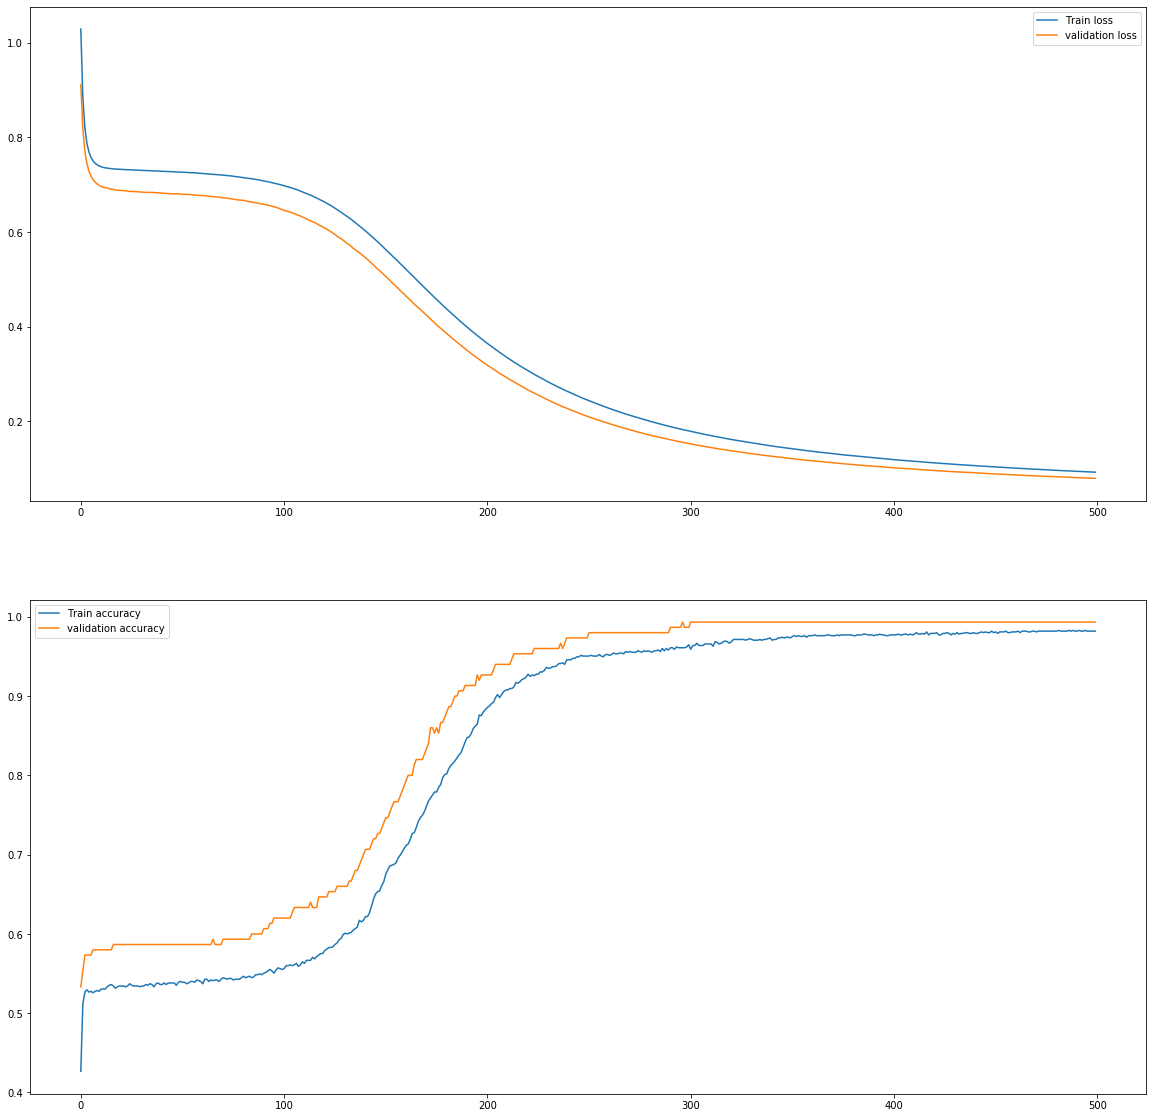

In [100]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 1)
train_loss_hdl = plt.plot(hist.epoch, hist.history['loss'])
val_loss_hdl = plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(labels=['Train loss', 'validation loss'])

plt.subplot(2, 1, 2)
train_acc_hdl = plt.plot(hist.epoch, hist.history['acc'])
val_acc_hdl = plt.plot(hist.epoch, hist.history['val_acc'])
plt.legend(labels=['Train accuracy', 'validation accuracy'])

plt.show()

# Evaluation

In [101]:
from sklearn.metrics import accuracy_score, classification_report

In [103]:
test_probs = mlp_model.predict(x_test)
test_labels = np.argmax(test_probs, axis=-1)
print(f"{accuracy_score(y_test, test_labels):.4f}")

0.9800


In [104]:
from ml_utils import plot_confusion_matrix, plot_multiclass_decision_boundary

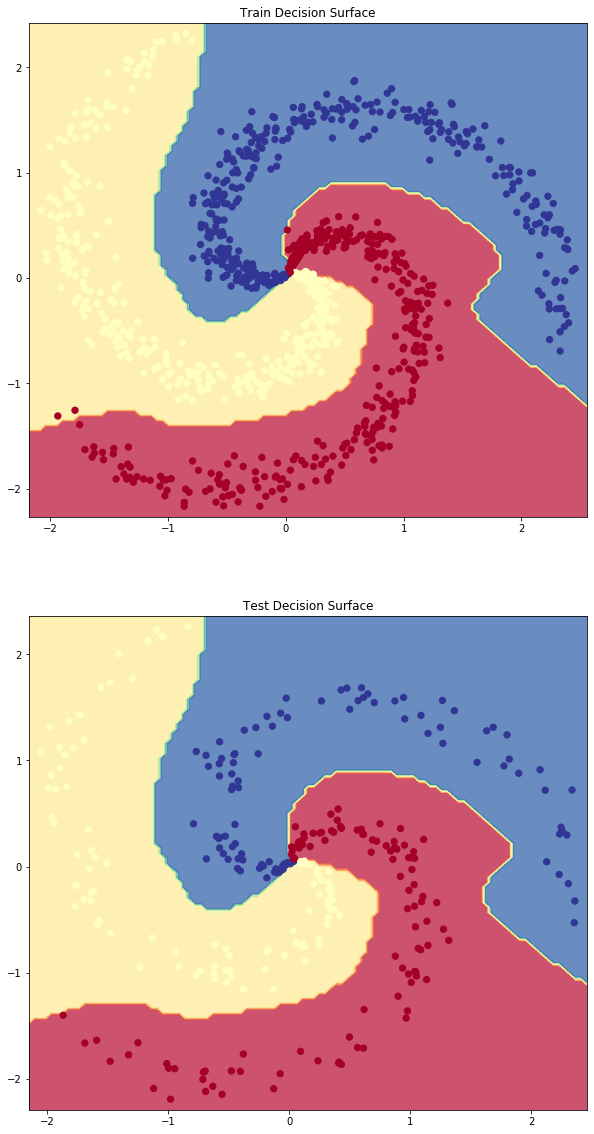

In [109]:
plt.figure(figsize=(10, 20))

plt.subplot(2,1,1)
plot_multiclass_decision_boundary(mlp_model, x_train, y_train)
plt.title('Train Decision Surface')

plt.subplot(2,1,2)
plot_multiclass_decision_boundary(mlp_model, x_test, y_test)
plt.title('Test Decision Surface')

plt.show()

<Figure size 1440x720 with 0 Axes>

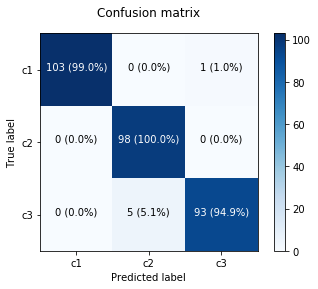

In [112]:
plt.figure(figsize=(20, 10))
plot_confusion_matrix(y_test, test_labels, y_encoder.classes_.tolist())
plt.show()

In [117]:
print(classification_report(y_test, test_labels, labels=[0, 1, 2]))

precision    recall  f1-score   support

           0       1.00      0.99      1.00       104
           1       0.95      1.00      0.98        98
           2       0.99      0.95      0.97        98

   micro avg       0.98      0.98      0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [115]:
y_encoder.classes_.tolist()

['c1', 'c2', 'c3']